# Find 3 Disks
Given an image with a background texture, and three overlaid texured disks, predict the centerpoint of the labeled “most concpicuous disk.”

In [1]:
import numpy as np

import math

# import numpy as np
# import matplotlib.pyplot as plt

# Python Imaging Library imports
# import Image
from PIL import Image
# import ImageDraw
from PIL import ImageDraw



# Import DiskFind utilities for PredatorEye.
import sys
sys.path.append('/content/drive/My Drive/PredatorEye/shared_code/')
import DiskFind as df

# Generate uniform texture dataset

df.sinusoid (0.00) 0.0
df.sinusoid (0.25) 0.1464466094067262
df.sinusoid (0.50) 0.49999999999999994
df.sinusoid (0.75) 0.8535533905932737
df.sinusoid (1.00) 1.0
df.clip(-1, 0, 1) = 0
df.clip(0, 0, 1) = 0
df.clip(0.5, 0, 1) = 0.5
df.clip(1, 0, 1) = 1
df.clip(2, 0, 1) = 1
df.spot_utility(np.array([1,1]), np.array([1,1]), 0, 1) = 1.0
df.spot_utility(np.array([1,1]), np.array([0,1]), 0, 1) = 0.0
df.spot_utility(np.array([0.5,0.5]), np.array([1,1]), 0, 1) = 0.1971500664605933
df.interpolate(0, np.array([0, 0, 0]), np.array([0.1, 0.2, 0.3])) = [0. 0. 0.]
df.interpolate(0.5, np.array([0, 0, 0]), np.array([0.1, 0.2, 0.3])) = [0.05 0.1  0.15]
df.interpolate(1, np.array([0, 0, 0]), np.array([0.1, 0.2, 0.3])) = [0.1 0.2 0.3]


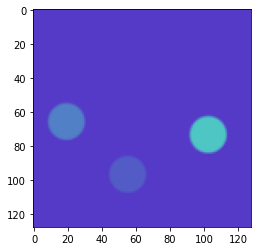

In [24]:
dataset_size = 1000
image_size = 128
image_depth = 3  # for RGB
disk_radius = image_size * df.relative_disk_radius()

def MakeUniformTextureDataset():
    dataset_shape = (dataset_size, image_size, image_size, image_depth)
    dataset = np.zeros(dataset_shape, dtype=np.float32)
    return dataset

def generateUniformExample():
    bg_color = np.random.random_sample(image_depth)
    fg_color = np.random.random_sample(image_depth)
    # print('bg_color =', bg_color)
    # print('fg_color =', fg_color)
    image_shape = (image_size, image_size, image_depth)
    image = np.full(image_shape, bg_color, dtype=np.float32)

    def random_center():
        s = image_size - (2 * disk_radius)
        return (np.random.random_sample(2) * s) + disk_radius

    # print('type(random_center()) =', type(random_center()))
    # print('random_center().shape =', random_center().shape)
    # print('random_center().dtype =', random_center().dtype)

    centers = [random_center()]
    min_dist = 3 * disk_radius
    while len(centers) < 3:
        c = random_center()
        all_ok = True
        for o in centers:
            if (df.dist2d(c, o) < min_dist):
                all_ok = False
        if (all_ok):
            centers.append(c)

    # def draw_disk(center):
    #     cx = int(center[0])
    #     cy = int(center[1])
    #     dr = int(disk_radius)
    #     for x in range(cx - dr, cx + dr + 1):
    #         for y in range(cy - dr, cy + dr + 1):
    #             # o = [x - cx, y - cy]
    #             # d = math.sqrt(math.pow(o[0], 2) + math.pow(o[1], 2))
    #             d = math.sqrt(math.pow(x - cx, 2) + math.pow(y - cy, 2))
    #             if (d <= dr):
    #                 # image[x, y, :] = fg_color
    #                 # image[x, y, :] = df.interpolate(d / dr, fg_color, bg_color)
    #                 # blend = df.spot_utility((x,y), center, dr * 0.9, dr)
    #                 blend = df.spot_utility((x,y), center, dr * 0.8, dr)
    #                 # image[x, y, :] = df.interpolate(blend, fg_color, bg_color) 
    #                 image[x, y, :] = df.interpolate(blend, bg_color, fg_color) 

    def draw_disk(center, color):
        cx = int(center[0])
        cy = int(center[1])
        dr = int(disk_radius)
        for x in range(cx - dr, cx + dr + 1):
            for y in range(cy - dr, cy + dr + 1):
                # o = [x - cx, y - cy]
                # d = math.sqrt(math.pow(o[0], 2) + math.pow(o[1], 2))
                d = math.sqrt(math.pow(x - cx, 2) + math.pow(y - cy, 2))
                if (d <= dr):
                    # image[x, y, :] = fg_color
                    # image[x, y, :] = df.interpolate(d / dr, fg_color, bg_color)
                    # blend = df.spot_utility((x,y), center, dr * 0.9, dr)
                    blend = df.spot_utility((x,y), center, dr * 0.8, dr)
                    # image[x, y, :] = df.interpolate(blend, fg_color, bg_color) 
                    image[x, y, :] = df.interpolate(blend, bg_color, color) 

    # for c in centers:
    #     draw_disk(c)

    # draw_disk(centers[0], fg_color)
    # draw_disk(centers[1], df.interpolate(0.33, fg_color, bg_color))
    # draw_disk(centers[2], df.interpolate(0.66, fg_color, bg_color))

    draw_disk(centers[0], fg_color)
    draw_disk(centers[1], df.interpolate(0.50, fg_color, bg_color))
    draw_disk(centers[2], df.interpolate(0.75, fg_color, bg_color))

    df.draw_image(image)

uniform_dataset = MakeUniformTextureDataset()
# print('uniform_dataset.shape =', uniform_dataset.shape)
# print('uniform_dataset.dtype =', uniform_dataset.dtype)

print('df.sinusoid (0.00)', df.sinusoid (0.00))
print('df.sinusoid (0.25)', df.sinusoid (0.25))
print('df.sinusoid (0.50)', df.sinusoid (0.50))
print('df.sinusoid (0.75)', df.sinusoid (0.75))
print('df.sinusoid (1.00)', df.sinusoid (1.00))

print('df.clip(-1, 0, 1) =', df.clip(-1, 0, 1))
print('df.clip(0, 0, 1) =', df.clip(0, 0, 1))
print('df.clip(0.5, 0, 1) =', df.clip(0.5, 0, 1))
print('df.clip(1, 0, 1) =', df.clip(1, 0, 1))
print('df.clip(2, 0, 1) =', df.clip(2, 0, 1))

print('df.spot_utility(np.array([1,1]), np.array([1,1]), 0, 1) =',
      df.spot_utility(np.array([1,1]), np.array([1,1]), 0, 1))
print('df.spot_utility(np.array([1,1]), np.array([0,1]), 0, 1) =',
      df.spot_utility(np.array([1,1]), np.array([0,1]), 0, 1))
print('df.spot_utility(np.array([0.5,0.5]), np.array([1,1]), 0, 1) =',
      df.spot_utility(np.array([0.5,0.5]), np.array([1,1]), 0, 1))


print('df.interpolate(0, np.array([0, 0, 0]), np.array([0.1, 0.2, 0.3])) =',
      df.interpolate(0, np.array([0, 0, 0]), np.array([0.1, 0.2, 0.3])))
print('df.interpolate(0.5, np.array([0, 0, 0]), np.array([0.1, 0.2, 0.3])) =',
      df.interpolate(0.5, np.array([0, 0, 0]), np.array([0.1, 0.2, 0.3])))
print('df.interpolate(1, np.array([0, 0, 0]), np.array([0.1, 0.2, 0.3])) =',
      df.interpolate(1, np.array([0, 0, 0]), np.array([0.1, 0.2, 0.3])))

generateUniformExample()